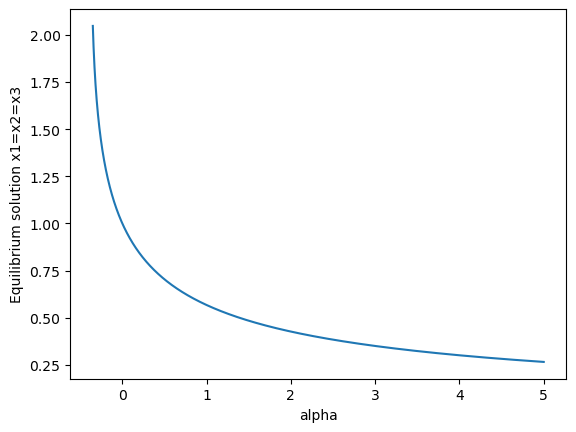

In [11]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve


N = 5350


# Set up the values of alpha that we want to consider: [-1, 10]
alpha = np.linspace(-0.35,5,N)

equil = np.zeros(N)
i_equil = []
alpha_equil = []


for i in range(N):
    f  = lambda x: np.exp(-alpha[i]*x) -x;
    # fp = lambda a, x3: -a*np.exp(-a*3) - 1;
    sol = fsolve(f, 1, full_output="TRUE")  
                # full_output makes the function fsolve return other details about the outcome of the method
                # such as whether or not the method converged, which is stored in the third component sol[2]
    if (sol[2]==1): # If fsolve found a solution 
        equil[i] = sol[0][0]
        i_equil.append(i)
        alpha_equil.append(alpha[i])
        
    else : # If fsolve couldn't find an equilibrium
        equil[i] = 'NaN'
        

plt.plot(alpha,equil)
plt.xlabel("alpha");
plt.ylabel("Equilibrium solution x1=x2=x3");


/tmp/ipykernel_638/3850177833.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i], Evec = np.linalg.eig(J(i_equil[i]));


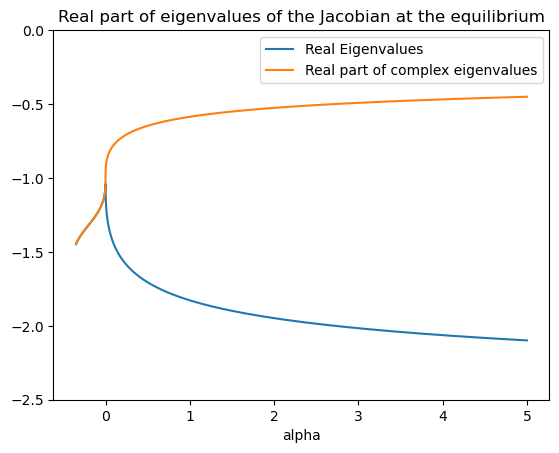

In [12]:
# Construct the Jacobian at the equilibrium for each alpha
#
# J(i) gives the Jacobian matrix for alpha[i] and its corresponding equilibrium

J = lambda i: np.array([[-1, 0, -alpha[i]*np.exp(-alpha[i]*equil[i])],[1,-1,0],[0,1,-1]]);

# Create the array that is going to store the real part of the eigenvalues of the Jacobian
N_eq = len(i_equil)
eig = np.zeros([N_eq,3])


# Calculate the eigenvalues of the Jacobian
for i in range(N_eq):
    eig[i], Evec = np.linalg.eig(J(i_equil[i]));
    eig[i].sort()

# Plot the eigenvalues of the Jacobian
plt.plot(alpha_equil, eig[:,0], alpha_equil, eig[:,1])
plt.xlabel('alpha');
plt.title('Real part of eigenvalues of the Jacobian at the equilibrium');
plt.yticks(np.arange(-2.5, 0.1, 0.5));
plt.legend(["Real Eigenvalues", "Real part of complex eigenvalues"]);